In [1]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['train.csv']
frame = ds.to_dataframe()

In [2]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['test.csv']
test_frame = ds.to_dataframe()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
df_train = pd.DataFrame(frame)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_test= pd.DataFrame(test_frame)

In [7]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


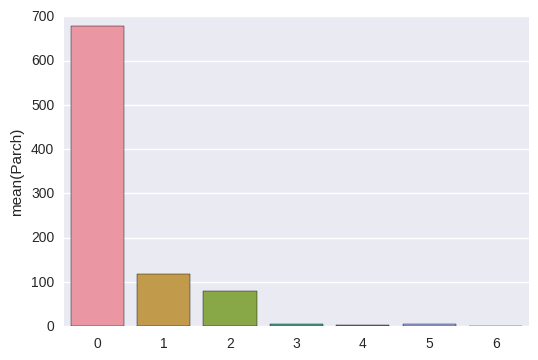

In [9]:
X=df_train.Parch.value_counts()
sns.barplot(X.index,X)

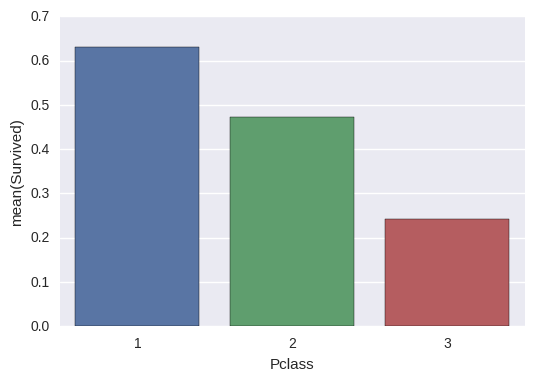

In [10]:
T=(df_train[['Pclass','Survived']].groupby('Pclass').mean())
T.reset_index()
sns.barplot(T.index,T.Survived)


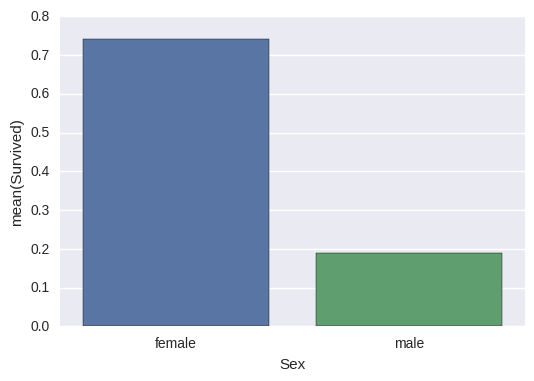

In [11]:
D=(df_train[['Sex','Survived']].groupby('Sex').mean())
D.reset_index()
sns.barplot(D.index,D.Survived)


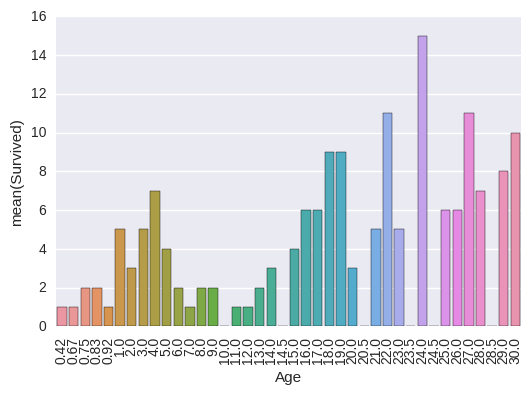

In [12]:
E=(df_train[['Age','Survived']].groupby('Age',sort=1).sum())[:30]
E.reset_index()
F=sns.barplot(x=E.index,y=E.Survived)
F.set_xticklabels(F.get_xticklabels(), rotation=90)



In [13]:
E

,Survived
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
1.00,5
2.00,3
3.00,5
4.00,7


In [14]:
df_train.Age.unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [15]:
v=df_train.Age.isnull()
v.sum()

177

In [16]:
#for dataset in df_train:
    #age_avg = dataset['Age'].mean()
    #age_std = dataset['Age'].std()
    #age_null_count = dataset['Age'].isnull().sum()
    

In [17]:
age_avg = df_train['Age'].mean()
age_std = df_train['Age'].std()
age_null_count = df_train['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg-age_std,age_avg+age_std,size=age_null_count)


In [18]:
df_train.Age[np.isnan(df_train['Age'])]=age_null_random_list
df_train['CategoricalAge'] = pd.cut(df_train['Age'], 5)



/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
df_train[['CategoricalAge','Survived']].groupby('CategoricalAge',sort=1,as_index=0)
#E.reset_index()
#F=sns.barplot(x=E.CategoricalAge,y=E.Survived)
#F.set_xticklabels(F.get_xticklabels(), rotation=90)





In [20]:
list(df_train.Name.unique())

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Rice, Master. Eugene',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Fynney, Mr. Joseph J',
 'Beesley, Mr. Lawrence',
 'McGowan, Miss. Anna "Annie"',
 'Sloper, Mr. William Thompson',
 'Palsson, Miss. Torborg Danira',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Emir, Mr. Farred Chehab',
 'Fortune, Mr. Charles Alexander',
 '

In [21]:
import re as re

In [22]:
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.',name)
    if title_search :
        return title_search.group(1)
    return ''

In [23]:
df_train['Title'] = df_train['Name'].apply(get_title)

In [24]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Mme           1
Countess      1
Lady          1
Don           1
Ms            1
Sir           1
Jonkheer      1
Name: Title, dtype: int64

In [25]:
pd.crosstab(df_train['Title'],df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [26]:
df_train.Title.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare',inplace=True)

In [27]:
df_train.Title.replace('Mlle','Miss',inplace = True)
df_train.Title.replace('Mme','Mrs',inplace = True)
df_train.Title.replace('Ms','Miss',inplace = True)


In [28]:
df_train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [29]:
K=df_train[['Title','Survived']].groupby('Title',as_index=0).mean()
K


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


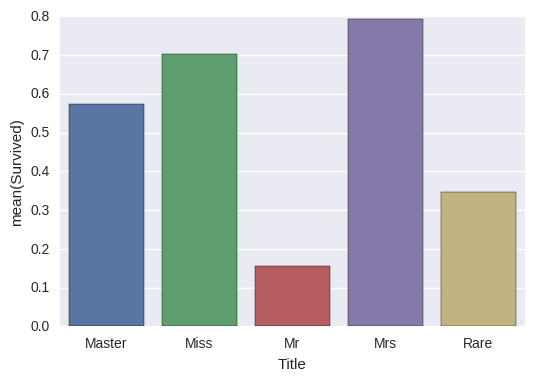

In [30]:
sns.barplot(K.Title,K.Survived)

# Data Cleaning

In [31]:
df_train.Sex = df_train.Sex.map({'male':1,'female':0})
df_train.Sex.unique()

array([1, 0])

In [32]:
df_train.Title = df_train.Title.map({'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Rare':4})

In [33]:
df_train.Title.isnull().unique()

array([False], dtype=object)

In [34]:
#df_train.drop(df_train[df_train.Embarked.isnull()],axis=0,inplace =True)
#df_train.Embarked.

In [35]:
df_train.Embarked.dropna(inplace = 1)

In [36]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [37]:
df_train.Embarked=df_train.Embarked.map({'S':1, 'C':2, 'Q':3})

In [38]:
df_train.Embarked.dropna(inplace=True)

In [39]:
df_train.Embarked.unique()

array([ 1.,  2.,  3.])

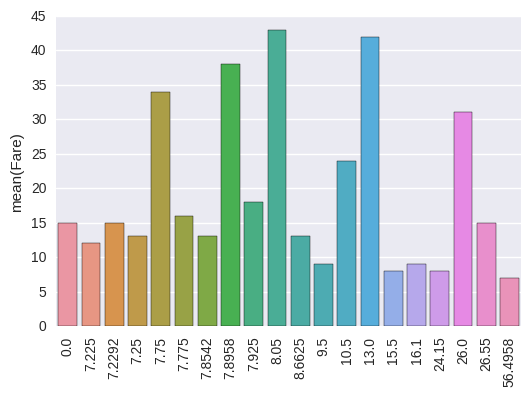

In [40]:
L=df_train.Fare.value_counts().iloc[:20]
u=sns.barplot(L.index,L)
u.set_xticklabels(u.get_xticklabels(), rotation=90)

In [41]:
# note the below code make changes for all the rows
#df_train.Fare=df_train.Fare[df_train.Fare<=7.91]=1---wrong

In [42]:
#Mapping Fare


#df_train.loc[(df_train.Fare>7.91)&(df_train.Fare<=14.45),'Fare']=1
#df_train.loc[(df_train.Fare<=7.91),'Fare']=0


df_train.Fare = np.where((df_train.Fare<=7.91),0,df_train.Fare)
df_train.Fare= np.where(((df_train.Fare>7.91) & (df_train.Fare<=14.45)),1,df_train.Fare)
df_train.Fare = np.where(((df_train.Fare>14.45) & (df_train.Fare<=31)),2,df_train.Fare)
df_train.Fare = np.where((df_train.Fare>31),3,df_train.Fare)

In [43]:
df_train.Fare.value_counts()
#type(df_train)

2.0    229
0.0    223
3.0    222
1.0    217
Name: Fare, dtype: int64

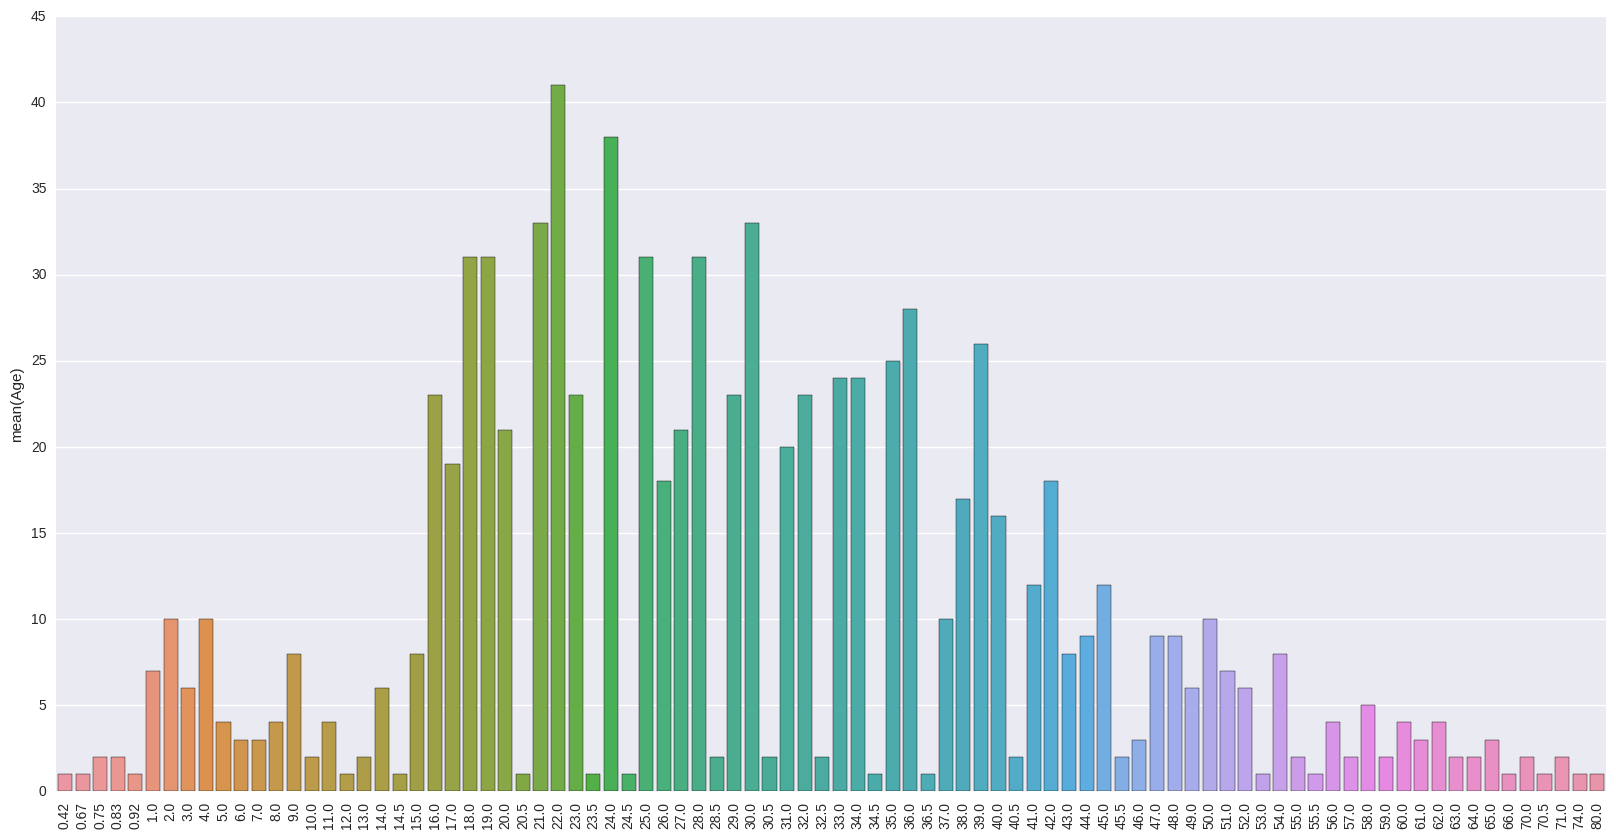

In [44]:
#Mapping Age

Y=df_train.Age.value_counts()
plt.figure(figsize=(20,10))
I = sns.barplot(Y.index,Y)
I.set_xticklabels(I.get_xticklabels(),rotation=90)

In [45]:
df_train.Age = np.where((df_train.Age<=22),1,df_train.Age)
df_train.Age = np.where(((df_train.Age>22) & ((df_train.Age<=35))),2,df_train.Age)
df_train.Age = np.where(((df_train.Age>35) & ((df_train.Age<=50))),3,df_train.Age)
df_train.Age = np.where((df_train.Age>50),4,df_train.Age)


In [46]:
df_train.Age.value_counts()

2.0    343
1.0    286
3.0    198
4.0     64
Name: Age, dtype: int64

In [47]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch']

df_train.drop(drop_elements,axis=1,inplace = True)

In [48]:
df_train.drop('CategoricalAge',axis=1,inplace = True)


In [49]:

#X_train.isnull().count()


NameError: name 'X_train' is not defined

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [51]:
df1 = df_train.iloc[:,1:]
df2 = df_train.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.33, random_state=42)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)


clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X=X_train,y=y_train)
y_predicted=clf.predict(X=X_test)




/home/nbuser/anaconda3_23/lib/python3.4/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [53]:
f1_score(y_test, y_predicted)

0.73684210526315774

In [54]:
from sklearn.svm import SVC

In [55]:
clf = SVC(random_state=0)
clf.fit(X=X_train,y=y_train)
y_predicted=clf.predict(X=X_test)

In [56]:
f1_score(y_test, y_predicted)

0.75925925925925919

In [57]:
accuracy_score(y_test, y_predicted)

0.82372881355932204

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
clf = LogisticRegression(random_state=0)
clf.fit(X=X_train,y=y_train)
y_predicted=clf.predict(X=X_test)

In [60]:
f1_score(y_test, y_predicted)

0.75213675213675213

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X=X_train,y=y_train)
y_predicted=clf.predict(X=X_test)

In [63]:
f1_score(y_test, y_predicted)

0.72489082969432317

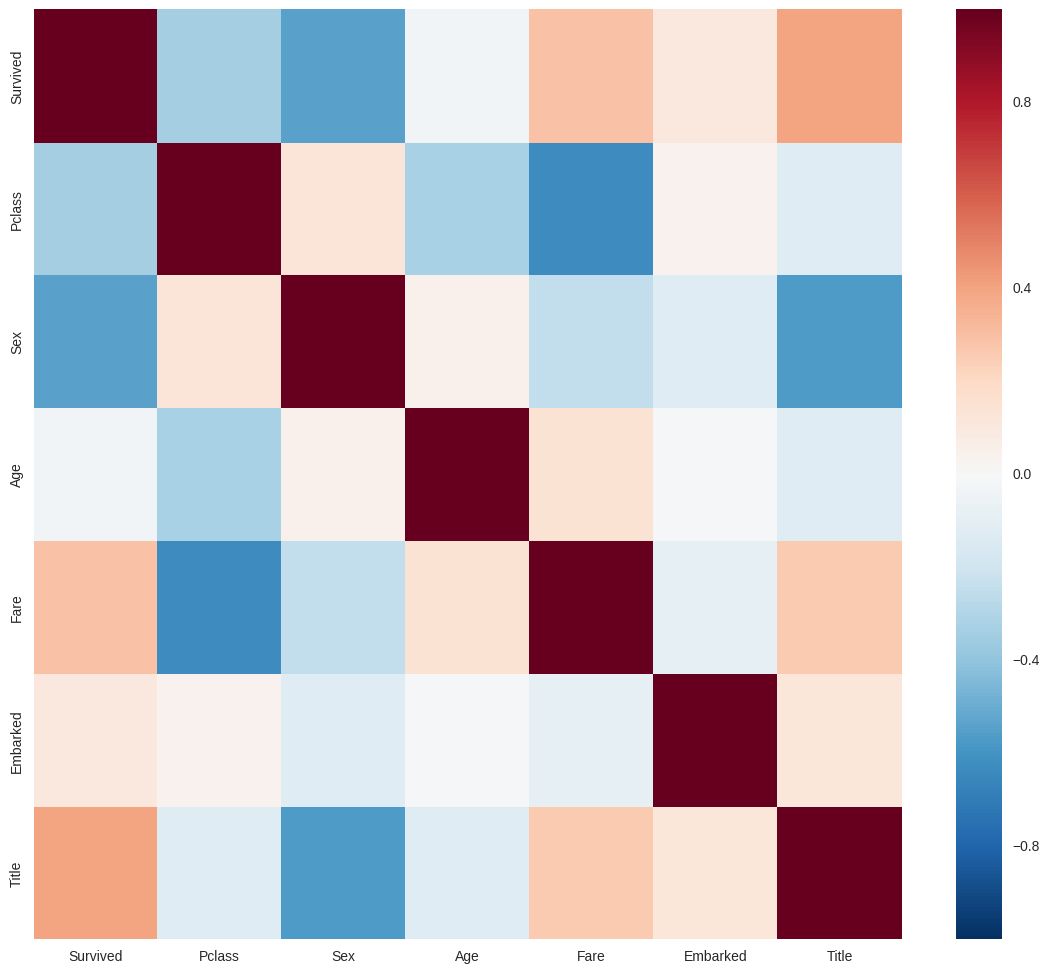

In [67]:
plt.figure(figsize = (14,12))

sns.heatmap(df_train.corr())

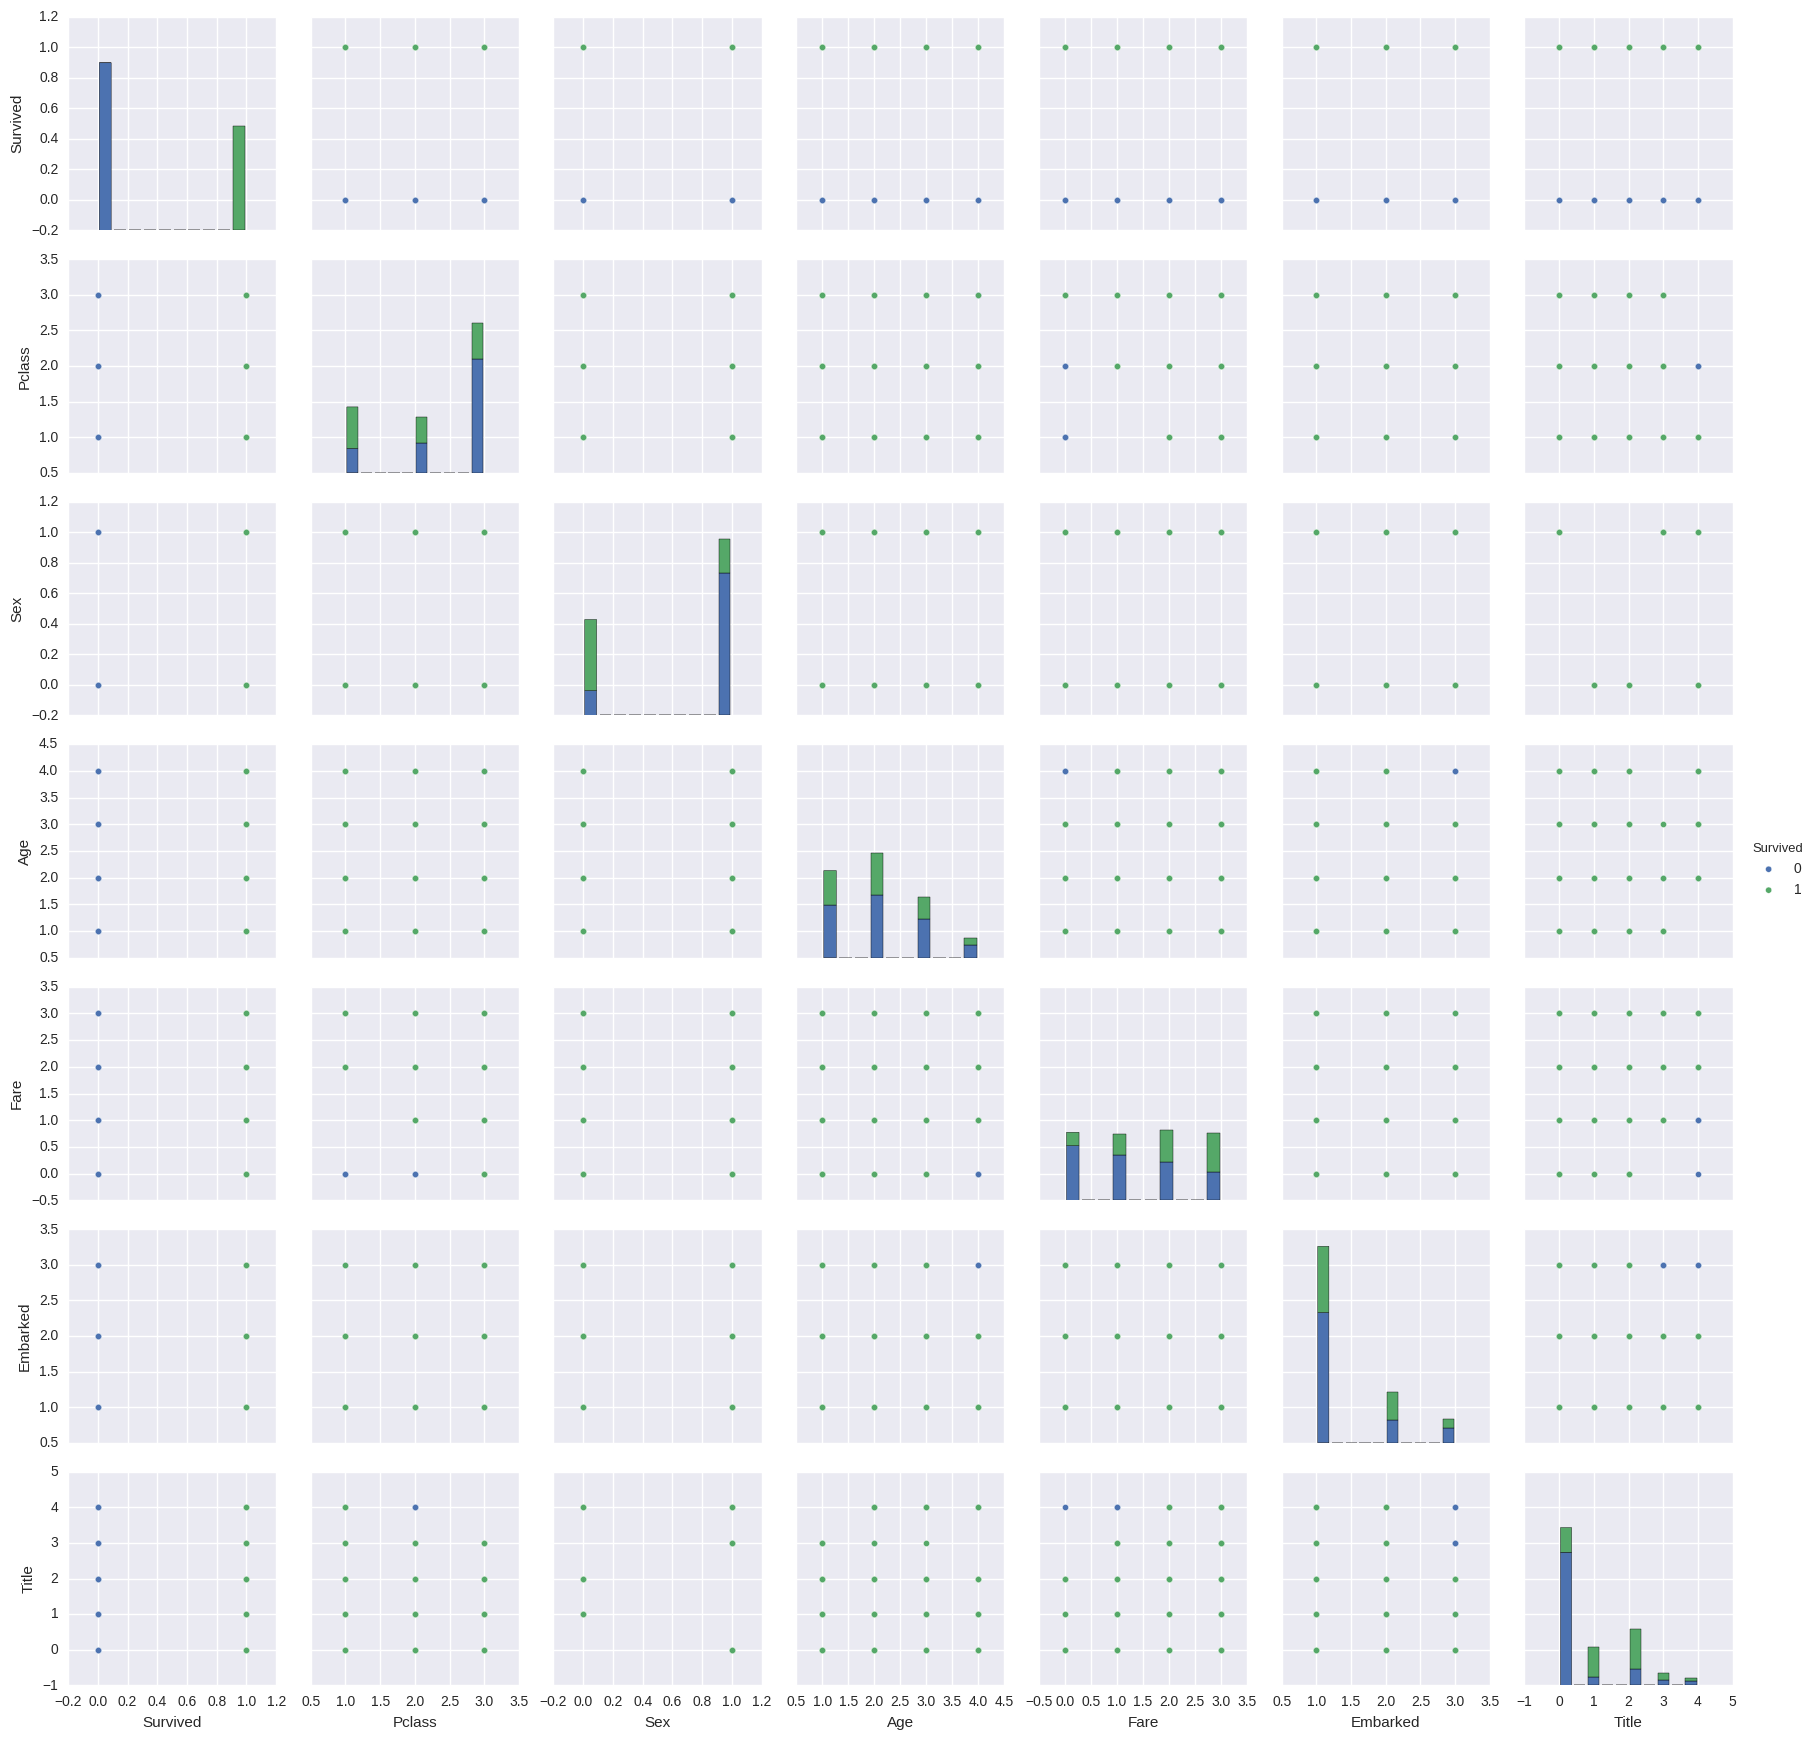

In [70]:
sns.pairplot(df_train,hue ='Survived')